# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        time.sleep(1)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | deqen
Processing Record 4 of Set 1 | jalai nur
Processing Record 5 of Set 1 | nema
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | bilderstoeckchen
City not found. Skipping...
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | ulsteinvik
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | daltonganj
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | gitega
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | nagqu
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,72.88,83,35,19.86,PN,1732670270
1,lihue,21.9789,-159.3672,80.74,65,0,17.27,US,1732670272
2,deqen,29.9618,90.7188,22.01,57,0,4.81,CN,1732670274
3,jalai nur,49.4500,117.7000,13.73,76,100,18.66,CN,1732670276
4,nema,57.5067,50.5011,24.78,88,5,4.00,RU,1732670278


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.88,83,35,19.86,PN,1732670270
1,lihue,21.9789,-159.3672,80.74,65,0,17.27,US,1732670272
2,deqen,29.9618,90.7188,22.01,57,0,4.81,CN,1732670274
3,jalai nur,49.4500,117.7000,13.73,76,100,18.66,CN,1732670276
4,nema,57.5067,50.5011,24.78,88,5,4.00,RU,1732670278


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

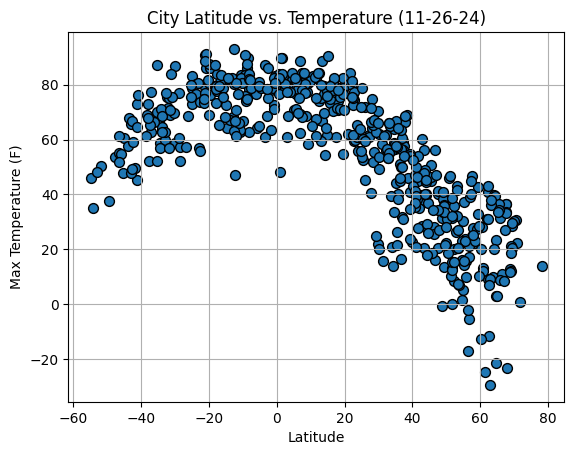

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

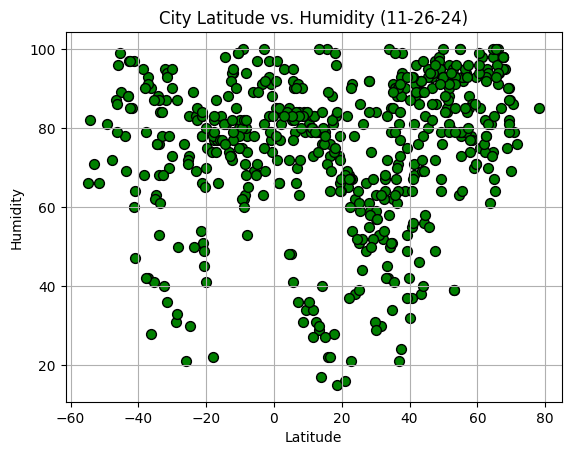

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="green",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

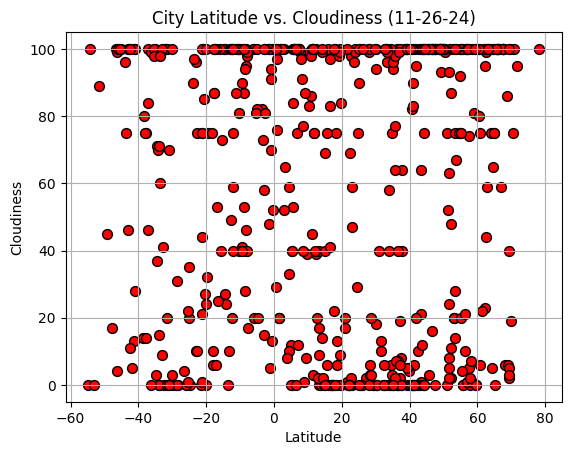

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="red",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

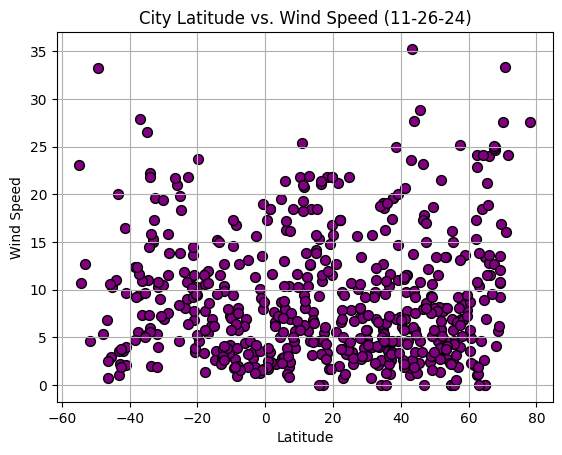

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="purple",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, text_coordinates, color):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lihue,21.9789,-159.3672,80.74,65,0,17.27,US,1732670272
2,deqen,29.9618,90.7188,22.01,57,0,4.81,CN,1732670274
3,jalai nur,49.4500,117.7000,13.73,76,100,18.66,CN,1732670276
4,nema,57.5067,50.5011,24.78,88,5,4.00,RU,1732670278
7,anadyr,64.7500,177.4833,23.50,74,100,13.42,RU,1732670287


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,72.88,83,35,19.86,PN,1732670270
5,edinburgh of the seven seas,-37.0676,-12.3116,62.85,93,100,27.87,SH,1732670281
6,atafu village,-8.5421,-172.5159,83.84,71,28,16.73,TK,1732670283
9,port-aux-francais,-49.3500,70.2167,37.78,81,45,33.29,TF,1732670291
12,blackmans bay,-43.0167,147.3167,65.73,88,100,1.01,AU,1732670297


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7202643882787025


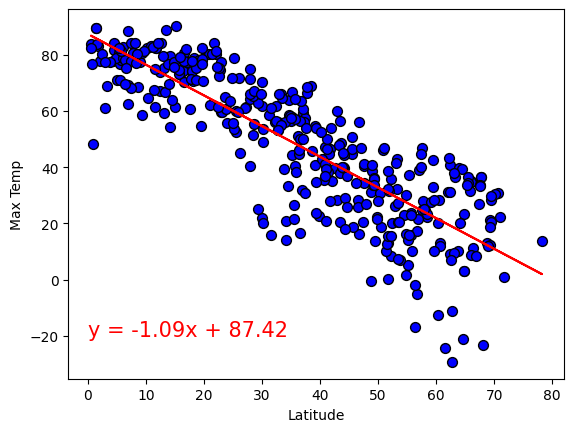

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values,(0,-20), "blue")

The r-value is: 0.3674727849572593


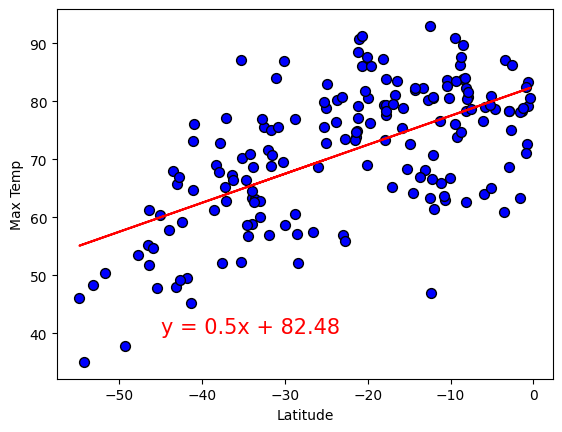

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values,(-45,40), "blue")

**Discussion about the linear relationship:** As latitude gets closer to the poles it gets colder on average.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08960423682920576


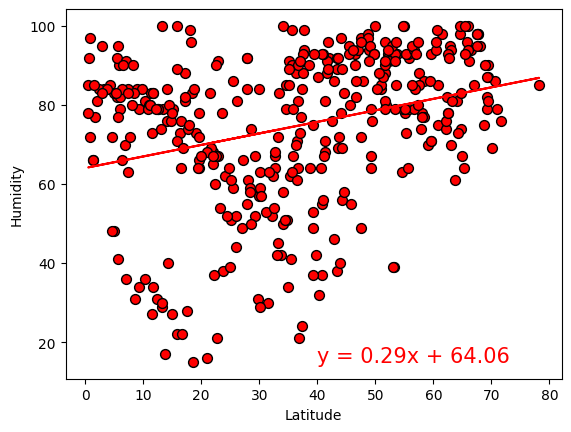

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values,(40,15), "red")

The r-value is: 0.010595677999706276


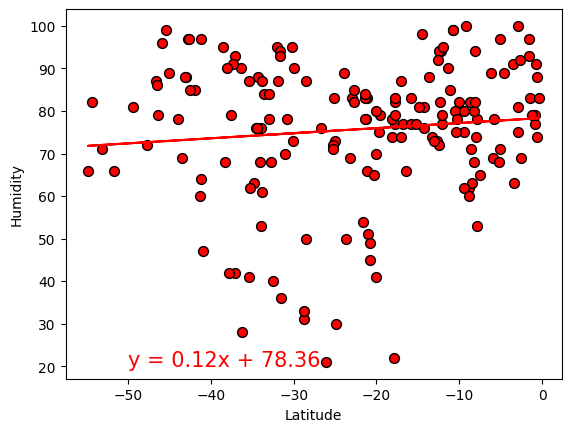

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values,(-50,20), "red")

**Discussion about the linear relationship:** There is little to no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.015313823534249751


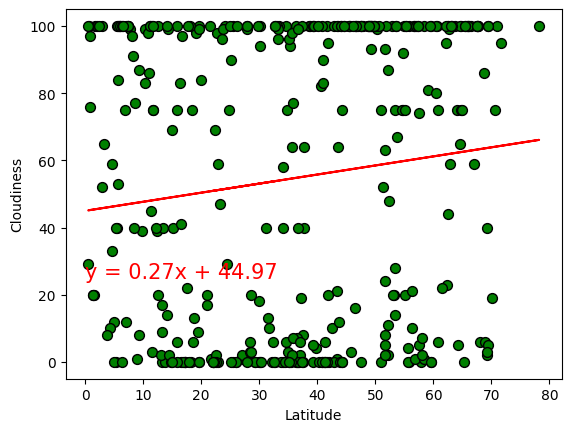

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values,(0,25), "green")

The r-value is: 0.01964012419872616


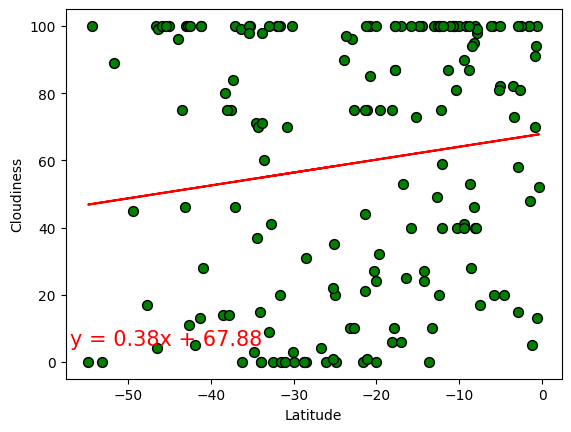

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values,(-57,5), "green")

**Discussion about the linear relationship:** There is little to no correlation between the clouds and the latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0059055901005892406


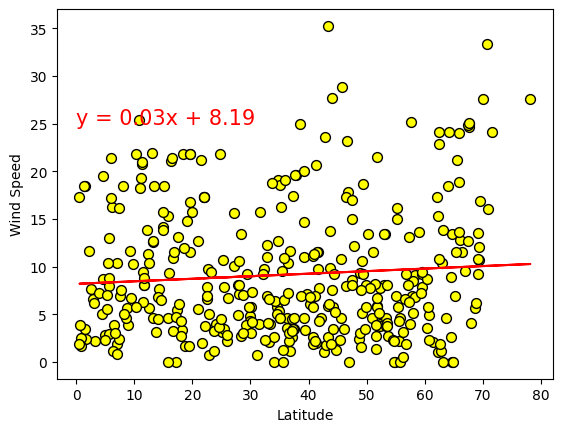

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values,(0,25), "yellow")

The r-value is: 0.0573088806169081


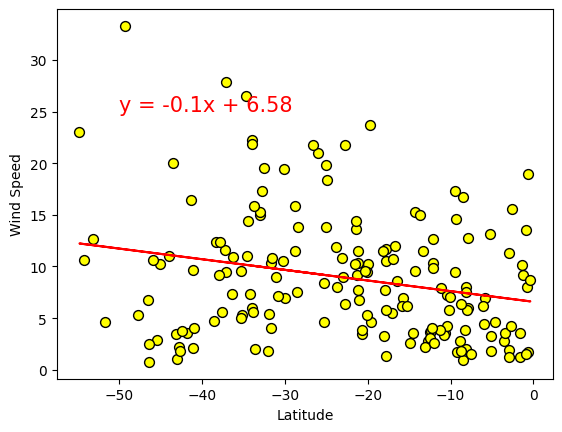

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values,(-50,25), "yellow")

**Discussion about the linear relationship:** There is little to no correlation between the two.